# Lasso, Ridge, Elastic Net  
lasso model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html   
ridge model: https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.Ridge.html  
elastic net: https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.ElasticNet.html

In [1]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the diabetes dataset (以糖尿病為例)
# All data had been normalized
diabetes = datasets.load_diabetes()

# use all of features 
diabetes_X = diabetes.data
diabetes_y = diabetes.target

print("diabetes_X shape: {}".format(diabetes_X.shape))
print("diabetes_y shape: {}".format(diabetes_y.shape))


#Split dataset into training/testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.1, random_state=1)

#Build model
model = linear_model.Lasso(alpha=0.1)
#model = linear_model.Ridge(alpha=1.0)
#model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model using the training sets
model.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(diabetes_y_test, diabetes_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(diabetes_y_test, diabetes_y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))



diabetes_X shape: (442, 10)
diabetes_y shape: (442,)
Coefficients: [  -0.         -151.56607497  566.82980479  250.89889702  -33.16176258
   -0.         -201.40569402    0.          479.29782308    8.807099  ]

Mean squared error: 3458.9228356708295
R2 score: 0.2888701731128981
number of model coef: 7


## 探討 ridge and lasso 於不同 alpha 下挑選特徵的效果

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

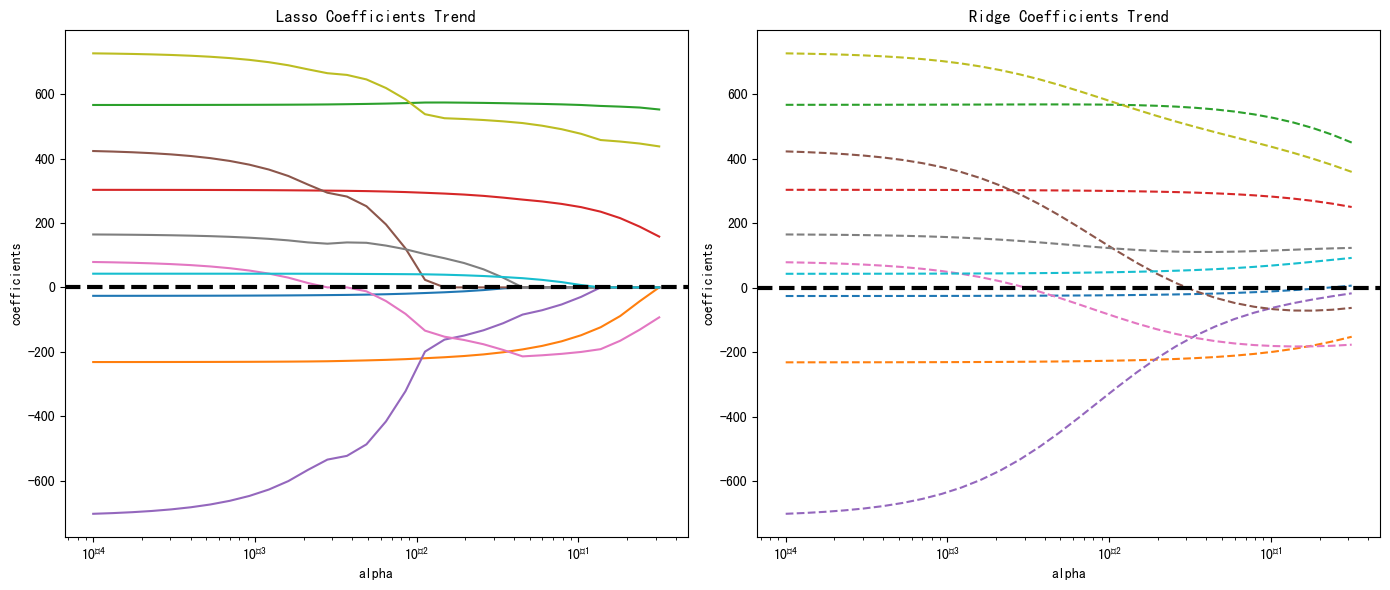

Lasso Coefficients: [  0.          -0.         552.59769657 157.7899227   -0.
  -0.         -93.0336619    0.         437.89132014   0.        ]

Ridge Coefficients: [   5.93147405 -152.604081    449.55571667  249.70363585  -17.89882688
  -63.05532056 -177.19309201  122.91364065  358.56824306   91.89815344]

alphas:  [1.00000000e-04 1.32035178e-04 1.74332882e-04 2.30180731e-04
 3.03919538e-04 4.01280703e-04 5.29831691e-04 6.99564216e-04
 9.23670857e-04 1.21957046e-03 1.61026203e-03 2.12611233e-03
 2.80721620e-03 3.70651291e-03 4.89390092e-03 6.46167079e-03
 8.53167852e-03 1.12648169e-02 1.48735211e-02 1.96382800e-02
 2.59294380e-02 3.42359796e-02 4.52035366e-02 5.96845700e-02
 7.88046282e-02 1.04049831e-01 1.37382380e-01 1.81393069e-01
 2.39502662e-01 3.16227766e-01]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data
diabetes_y = diabetes.target

# Split dataset into training and testing data
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y, test_size=0.1, random_state=1)

# Range of alpha values to test
alphas = np.logspace(-4, -0.5, 30)


# Initialize lists to store coefficients
lasso_coefs = []
ridge_coefs = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a)
    ridge = linear_model.Ridge(alpha=a)

    lasso.fit(diabetes_X_train, diabetes_y_train)
    ridge.fit(diabetes_X_train, diabetes_y_train)

    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)

# Plotting the coefficients as a function of alpha using subplots
plt.figure(figsize=(14, 6))

# Lasso subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(alphas, lasso_coefs)
plt.axhline(0, color='black', linewidth=3, linestyle = "--")  # Bold horizontal line at zero
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso Coefficients Trend')

# Ridge subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(alphas, ridge_coefs, linestyle='--')
plt.axhline(0, color='black', linewidth=3, linestyle = "--")  # Bold horizontal line at zero
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge Coefficients Trend')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


print('Lasso Coefficients: {}\n'.format(lasso.coef_))
print('Ridge Coefficients: {}\n'.format(ridge.coef_))
print("alphas: ", alphas)

In [28]:
lasso_coefficient = pd.DataFrame(lasso.coef_.reshape(1, -1), columns=diabetes.feature_names)

ridge_coefficient = pd.DataFrame(ridge.coef_.reshape(1, -1), columns=diabetes.feature_names)

result = pd.concat([lasso_coefficient, ridge_coefficient], axis=0)

result.index = ['Lasso', 'Ridge']

result

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Lasso,0.000000,-0.000000,552.597697,157.789923,-0.000000,-0.000000,-93.033662,0.000000,437.891320,0.000000
Ridge,5.931474,-152.604081,449.555717,249.703636,-17.898827,-63.055321,-177.193092,122.913641,358.568243,91.898153


## Elastic Net 參數交叉比較

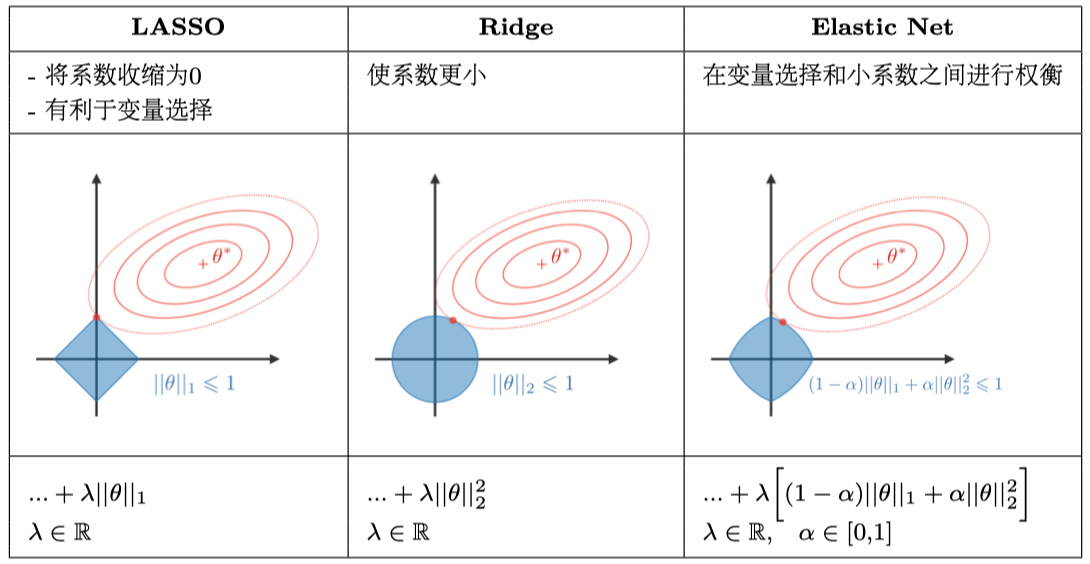

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

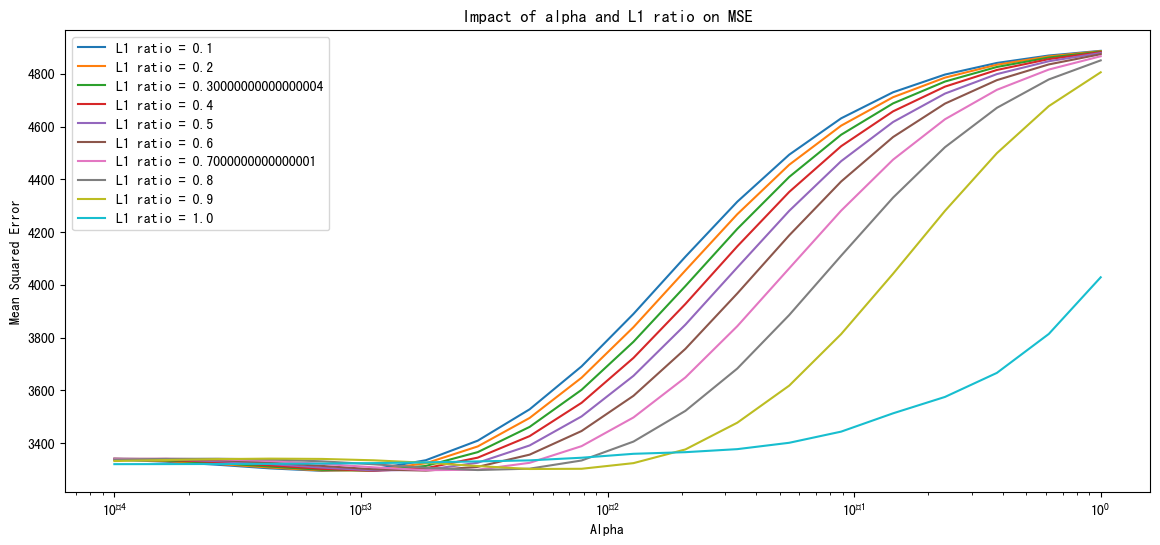

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split dataset into training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Define the range of alpha and l1_ratio
alphas = np.logspace(-4, 0, 20)  # 20 values from 10^-4 to 10^0
l1_ratios = np.linspace(0.1, 1, 10)  # 10 values from 0.1 to 1.0

# Prepare to collect metrics
results = []

# Loop over combinations of alpha and l1_ratio
for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append((alpha, l1_ratio, mse, r2))

# Convert results to a structured array
results = np.array(results, dtype=[('alpha', float), ('l1_ratio', float), ('mse', float), ('r2', float)])

# Plotting
plt.figure(figsize=(14, 6))

for l1_ratio in np.unique(results['l1_ratio']):
    subset = results[results['l1_ratio'] == l1_ratio]
    plt.plot(subset['alpha'], subset['mse'], label=f'L1 ratio = {l1_ratio}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Impact of alpha and L1 ratio on MSE')
plt.legend()
plt.show()

# Optionally, you can create a heatmap or more plots for R² scores similarly


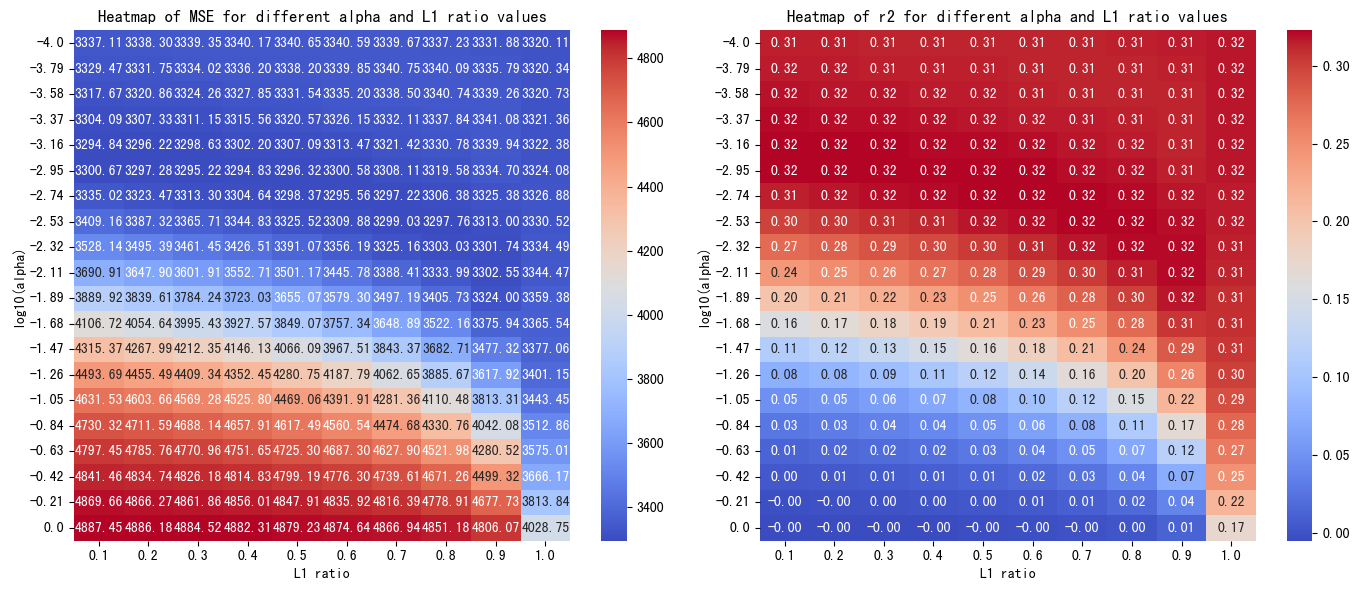

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split dataset into training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Define the range of alpha and l1_ratio
alphas = np.logspace(-4, 0, 20)  # 20 values from 10^-4 to 10^0
l1_ratios = np.linspace(0.1, 1, 10)  # 10 values from 0.1 to 1.0

# Prepare to collect metrics
mse_values = np.zeros((len(alphas), len(l1_ratios)))
r2_values = np.zeros((len(alphas), len(l1_ratios)))


# Loop over combinations of alpha and l1_ratio
for i, alpha in enumerate(alphas):
    for j, l1_ratio in enumerate(l1_ratios):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_values[i, j] = mse
        r2_values[i, j ] = r2

# Plotting the heatmap
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.heatmap(mse_values, xticklabels=np.round(l1_ratios, 2), yticklabels=np.round(np.log10(alphas), 2), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of MSE for different alpha and L1 ratio values')
plt.xlabel('L1 ratio')
plt.ylabel('log10(alpha)')



plt.subplot(1, 2, 2)  # 1 row, 2 columns, first subplot
sns.heatmap(r2_values, xticklabels=np.round(l1_ratios, 2), yticklabels=np.round(np.log10(alphas), 2), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of r2 for different alpha and L1 ratio values')
plt.xlabel('L1 ratio')
plt.ylabel('log10(alpha)')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


